In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

In [2]:
# 1. generate the artificial dataset. The distribution is mu=0.5, sd=0.35
obs_y = np.random.normal(0.5, 0.35, 1000)

In [3]:
# 2. model that data with a simple Bayesian model.
with pm.Model() as exercise1:

    stdev = pm.HalfNormal('stdev', sd=1.)
    mu = pm.Normal('mu', mu=0.0, sd=1.)

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

In [4]:
with exercise1:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, stdev]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:04<00:00, 1432.75draws/s]


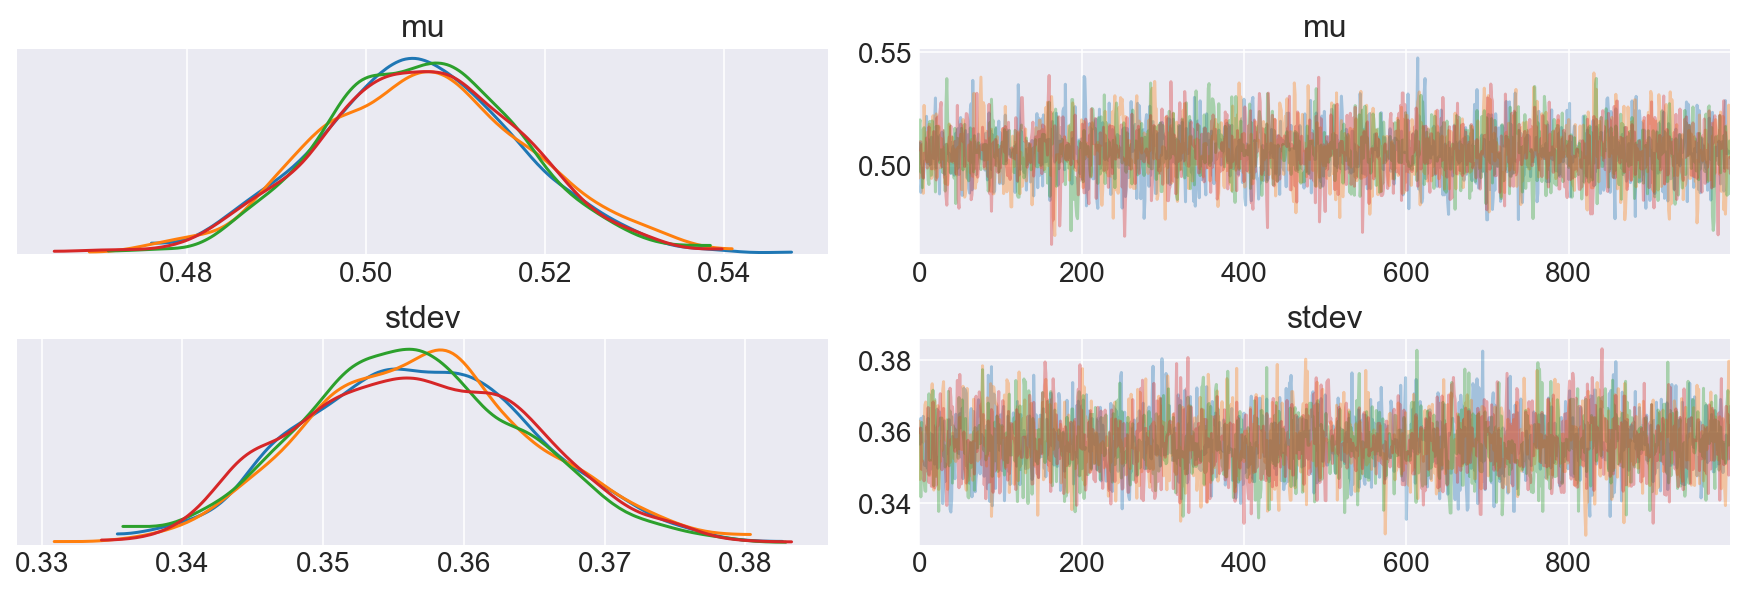

In [5]:
pm.traceplot(trace, ['mu', 'stdev']);